In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../_data/DataSet_Hitelbiralat_joados.csv')

In [4]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1


In [5]:
df['target'].value_counts()

1    40126
0     9874
Name: target, dtype: int64

In [6]:
# baseline
np.random.seed(1)

In [7]:
df['pred_baseline_proba'] = np.random.rand(df.shape[0])

In [8]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756


In [9]:
df['pred_baseline'] = df['pred_baseline_proba'].apply(lambda x: 1 if x >= 0.5 else 0)

In [10]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324,1
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114,0
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333,0
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756,0


In [11]:
accuracy_score(df['target'], df['pred_baseline'])

0.5034

In [12]:
recall_score(df['target'], df['pred_baseline'])

0.502865972187609

In [13]:
precision_score(df['target'], df['pred_baseline'])

0.8051875498802873

In [14]:
# TN FP
# FN TP
pd.DataFrame(confusion_matrix(df['target'], df['pred_baseline']))

,0,1
0,4992,4882
1,19948,20178


In [15]:
# TP
df.loc[(df['target'] == 1) &
      (df['pred_baseline'] == 1)].shape

(20178, 34)

In [16]:
# FP
df.loc[(df['target'] == 0) &
      (df['pred_baseline'] == 1)].shape

(4882, 34)

In [17]:
TP = df.loc[(df['target'] == 1) &
      (df['pred_baseline'] == 1)].shape[0]

TN = df.loc[(df['target'] == 0) &
      (df['pred_baseline'] == 0)].shape[0]

(TP + TN) / len(df)

0.5034

In [18]:
# logreg
dummy_cols = ['sex', 'marital_status', 'residence_type']

dummy_names = []

for column in dummy_cols:
    dummy_df = pd.get_dummies(df.loc[:, column],
                             drop_first = True, 
                             prefix = column)
    
    dummy_names = dummy_names + dummy_df.columns.tolist()
    
    df = pd.concat([df, dummy_df], axis = 1)

In [19]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324,1,0,0,0,1,0,0,0,1
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114,0,0,0,0,0,0,0,0,1
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333,0,0,0,0,0,0,0,0,1
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756,0,0,0,0,1,0,0,1,0


In [20]:
num_cols = ['age', 'months_in_residence', 'months_in_the_job', 
           'personal_net_income', 'mate_income']

In [21]:
X_cols = num_cols + dummy_names

In [22]:
y_col = 'target'

In [23]:
# bemeno attributumok
X = df.loc[:, X_cols]

In [24]:
# celvaltozo
y = df.loc[:, y_col]

In [25]:
X.isnull().sum()

age                    0
months_in_residence    0
months_in_the_job      0
personal_net_income    0
mate_income            0
sex_M                  0
marital_status_D       0
marital_status_O       0
marital_status_S       0
marital_status_V       0
residence_type_C       0
residence_type_O       0
residence_type_P       0
dtype: int64

In [26]:
model = LogisticRegression()

In [27]:
pred = cross_val_predict(model, X, y, cv = 4)

In [28]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
pred_proba = cross_val_predict(model, X, y, cv = 4, method = 'predict_proba')

In [30]:
pred_proba

array([[0.14447303, 0.85552697],
       [0.31553171, 0.68446829],
       [0.29267208, 0.70732792],
       ...,
       [0.27354199, 0.72645801],
       [0.13691101, 0.86308899],
       [0.2352793 , 0.7647207 ]])

In [31]:
df['pred_lr'] = pred

In [32]:
df['pred_lr_proba'] = pred_proba[:, 1]

In [33]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P,pred_lr,pred_lr_proba
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1,1,0.855527
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324,1,0,0,0,1,0,0,0,1,1,0.684468
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114,0,0,0,0,0,0,0,0,1,1,0.707328
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333,0,0,0,0,0,0,0,0,1,1,0.870089
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756,0,0,0,0,1,0,0,1,0,1,0.750985


In [34]:
accuracy_score(df['target'], df['pred_lr'])

0.8025

In [35]:
recall_score(df['target'], df['pred_lr'])

0.9999750785027165

In [36]:
df['pred_lr'].value_counts()

1    49999
0        1
Name: pred_lr, dtype: int64

In [37]:
X_train, X_test, y_train, y_testr = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [38]:
y_testr

26247    1
35067    1
34590    1
16668    0
12196    1
        ..
14876    1
42772    1
37248    0
6246     1
11103    0
Name: target, Length: 15000, dtype: int64

In [39]:
train_score_list = []
test_score_list = []

for i in range(1, 30):
    model = DecisionTreeClassifier(max_depth = i)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_train = model.predict(X_train)
    
    train_score_list.append(accuracy_score(y_train, pred_train))
    test_score_list.append(accuracy_score(y_testr, pred))

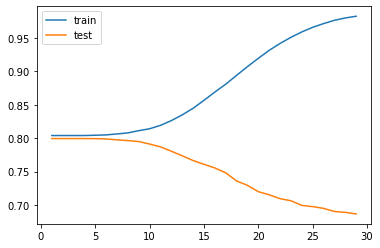

In [40]:
plt.plot(list(range(1, 30)), 
        train_score_list, label = 'train')

plt.plot(list(range(1, 30)),
        test_score_list, label = 'test')

plt.legend()

In [41]:
model = DecisionTreeClassifier(max_depth = 5)

In [42]:
pred = cross_val_predict(model, X, y, cv = 4)

In [43]:
pred_proba = cross_val_predict(model, X, y, cv = 4, method = 'predict_proba')

In [44]:
df['pred_dct'] = pred

In [45]:
df['pred_dct_proba'] = pred_proba[:, 1]

In [46]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P,pred_lr,pred_lr_proba,pred_dct,pred_dct_proba
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1,1,0.855527,1,0.882179
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324,1,0,0,0,1,0,0,0,1,1,0.684468,1,0.702069
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114,0,0,0,0,0,0,0,0,1,1,0.707328,1,0.749813
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333,0,0,0,0,0,0,0,0,1,1,0.870089,1,0.883823
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756,0,0,0,0,1,0,0,1,0,1,0.750985,1,0.749813


In [47]:
df['pred_dct'].value_counts()

1    49894
0      106
Name: pred_dct, dtype: int64

In [48]:
from sklearn.tree import plot_tree

In [49]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

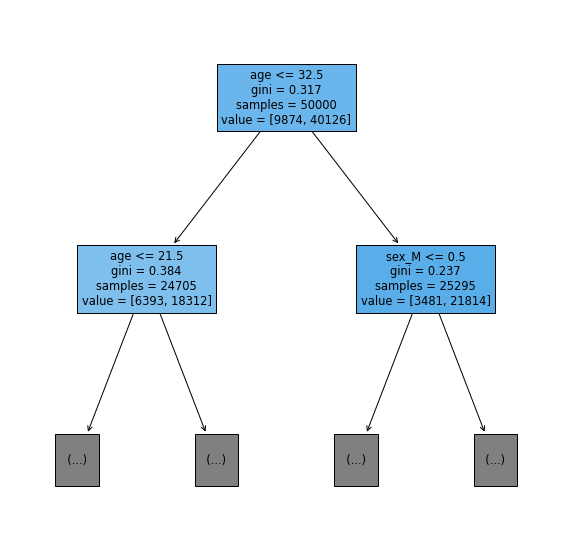

In [50]:
plt.figure(figsize = (10, 10))

plot_tree(model, max_depth = 1, 
         feature_names = X.columns, 
         filled = True)

plt.show()

In [51]:
df['profit'] = df['target'].apply(lambda x: 15000 if x == 1 else -100000)

In [52]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P,pred_lr,pred_lr_proba,pred_dct,pred_dct_proba,profit
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1,1,0.855527,1,0.882179,15000
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324,1,0,0,0,1,0,0,0,1,1,0.684468,1,0.702069,15000
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114,0,0,0,0,0,0,0,0,1,1,0.707328,1,0.749813,15000
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333,0,0,0,0,0,0,0,0,1,1,0.870089,1,0.883823,15000
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756,0,0,0,0,1,0,0,1,0,1,0.750985,1,0.749813,15000


In [53]:
df['profit_cumsum'] = df['profit'].cumsum()

In [54]:
df.loc[:, ['target', 'profit', 'profit_cumsum']].head()

,target,profit,profit_cumsum
0,1,15000,15000
1,1,15000,30000
2,1,15000,45000
3,1,15000,60000
4,1,15000,75000


Text(0, 0.5, 'celvaltozo')

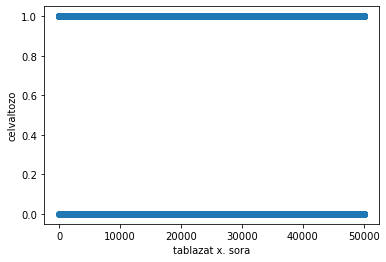

In [55]:
plt.scatter(df.index, df['target'])
plt.xlabel('tablazat x. sora')
plt.ylabel('celvaltozo')

In [56]:
df = df.sort_values('target', ascending = False).reset_index(drop = True)

Text(0, 0.5, 'celvaltozo')

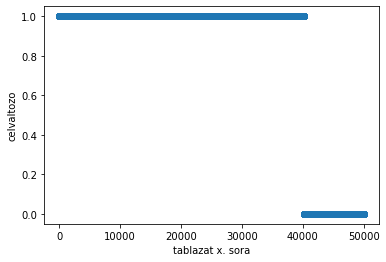

In [57]:
plt.scatter(df.index, df['target'])
plt.xlabel('tablazat x. sora')
plt.ylabel('celvaltozo')

In [58]:
df['profit_cumsum'] = df['profit'].cumsum()

Text(0, 0.5, 'profit cumsum')

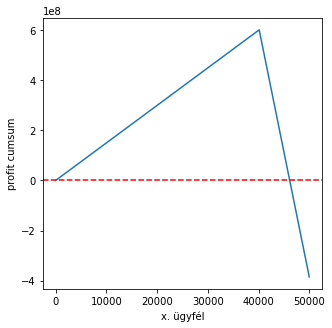

In [59]:
plt.figure(figsize = (5, 5))
plt.plot(df['profit_cumsum'])

plt.axhline(0, color = 'red', ls = '--')
plt.xlabel('x. ügyfél')
plt.ylabel('profit cumsum')

In [60]:
df['profit_cumsum'].max()

601890000

In [61]:
df.loc[df['profit_cumsum'] >= 0]

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P,pred_lr,pred_lr_proba,pred_dct,pred_dct_proba,profit,profit_cumsum
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1,1,0.855527,1,0.882179,15000,15000
1,31521,20,M,S,19,0,NaN,Y,31,12,0,C,24,Y,Y,Y,Y,36,40,0.0,Y,N,0,LIGIA MORAES RIBEIRO ALVE,IVONE MASSINE TOSTES,N,N,327.0,0,0,N,1,0.979518,1,1,0,0,1,0,1,0,0,1,0.691403,1,0.741100,15000,30000
2,31507,15,F,S,20,0,NaN,Y,31,12,0,P,12,Y,Y,Y,Y,24,713,0.0,Y,N,0,MARIA,NaN,N,N,356.0,0,0,N,1,0.231254,0,0,0,0,1,0,0,0,1,1,0.694344,1,0.683465,15000,45000
3,31509,16,F,C,46,0,NaN,Y,31,18,0,P,120,Y,Y,N,Y,12,24,0.0,Y,N,0,IVONE DA ROCHA,AUGUSTA DE SOUZA,N,N,220.0,0,0,N,1,0.657801,1,0,0,0,0,0,0,0,1,1,0.860859,1,0.874568,15000,60000
4,31511,22,F,O,28,0,NaN,Y,31,28,0,A,12,Y,Y,N,Y,12,26,0.0,Y,N,0,RITA,NaN,N,N,300.0,0,0,N,1,0.914791,1,0,0,1,0,0,0,0,0,1,0.751236,1,0.758310,15000,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,25662,22,F,V,49,0,NaN,N,50,20,0,P,48,Y,Y,N,Y,120,703,0.0,Y,N,0,ANTONIA,NaN,N,N,180.0,0,0,N,0,0.652163,1,0,0,0,0,1,0,0,1,1,0.893407,1,0.921627,-100000,490000
46140,19545,15,F,S,25,0,NaN,Y,31,20,0,P,288,Y,Y,Y,Y,24,653,0.0,Y,N,0,JUCIARA,LURDES,N,N,400.0,0,0,N,0,0.926228,1,0,0,0,1,0,0,0,1,1,0.788374,1,0.809825,-100000,390000
46141,25667,25,M,S,18,0,NaN,Y,31,20,0,P,24,Y,N,N,Y,12,999,0.0,Y,N,0,LEILA,VERA,N,N,1500.0,0,0,N,0,0.253995,0,1,0,0,1,0,0,0,1,1,0.673379,1,0.654206,-100000,290000
46142,25669,10,F,S,20,0,NaN,Y,31,18,0,P,240,Y,Y,Y,Y,0,35,0.0,Y,N,0,JUCELIA DE OLIVEIRA,SANCHA,N,N,476.0,0,0,N,0,0.294105,0,0,0,0,1,0,0,0,1,1,0.695039,1,0.741636,-100000,190000


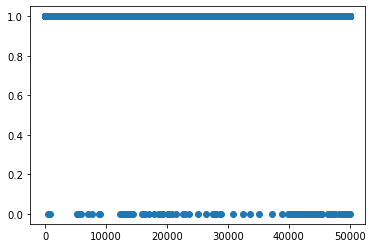

In [62]:
plt.scatter(df.index, df['pred_dct'])

In [63]:
def plot_profit_curve(df, sort_col):
    plot_df = df.sort_values(sort_col, ascending = False).reset_index(drop = True)
    plot_df['profit_cumsum'] = plot_df['profit'].cumsum()
    
    plt.plot(plot_df['profit_cumsum'], label = sort_col)
    plt.axhline(0, color = 'red', ls = '--')
    plt.legend()

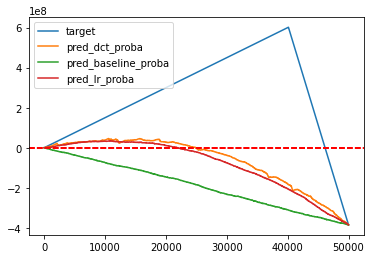

In [64]:
# referencia
plot_profit_curve(df, 'target')

# dontesi fat
plot_profit_curve(df, 'pred_dct_proba')

# baseline
plot_profit_curve(df, 'pred_baseline_proba')


plot_profit_curve(df, 'pred_lr_proba')

In [65]:
model = KNeighborsClassifier(n_neighbors=15)

In [66]:
pred = cross_val_predict(model, X, y, cv = 4)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [67]:
pred_proba = cross_val_predict(model, X, y, cv = 4, method = 'predict_proba')

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [68]:
df['pred_knn'] = pred

In [69]:
df['pred_knn_proba'] = pred_proba[:, 1]

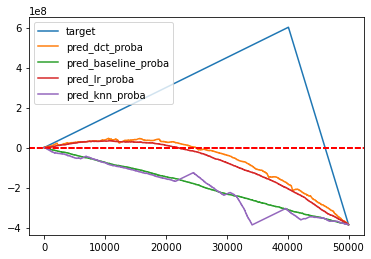

In [70]:
# referencia
plot_profit_curve(df, 'target')

# dontesi fat
plot_profit_curve(df, 'pred_dct_proba')

# baseline
plot_profit_curve(df, 'pred_baseline_proba')

plot_profit_curve(df, 'pred_lr_proba')

plot_profit_curve(df, 'pred_knn_proba')

In [71]:
X_cols

['age',
 'months_in_residence',
 'months_in_the_job',
 'personal_net_income',
 'mate_income',
 'sex_M',
 'marital_status_D',
 'marital_status_O',
 'marital_status_S',
 'marital_status_V',
 'residence_type_C',
 'residence_type_O',
 'residence_type_P']

In [72]:
df.loc[:, X_cols].describe()

,age,months_in_residence,months_in_the_job,personal_net_income,mate_income,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.684240,153.288000,50.600400,8.432965e+03,55.341441,0.304000,0.043080,0.05576,0.508440,0.048840,0.086860,0.040940,0.744620
std,13.076314,136.498105,73.890169,4.487915e+05,919.222986,0.459987,0.203039,0.22946,0.499934,0.215536,0.281633,0.198153,0.436079
min,15.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,36.000000,12.000000,2.700000e+02,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,120.000000,24.000000,4.000000e+02,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,43.000000,240.000000,60.000000,7.410000e+02,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1188.000000,1176.000000,3.852910e+07,150000.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
min_max_scaler = MinMaxScaler()

<AxesSubplot:>

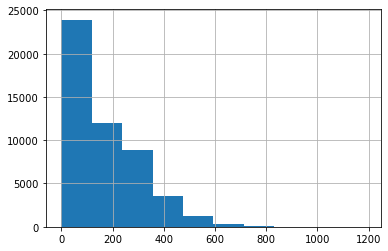

In [74]:
df['months_in_residence'].hist()

In [75]:
min_max_scaler.fit(df.loc[:, ['months_in_residence']])

MinMaxScaler()

In [76]:
scaled = min_max_scaler.transform(df.loc[:, ['months_in_residence']])

In [77]:
df['scaled_min_max'] = scaled

<AxesSubplot:>

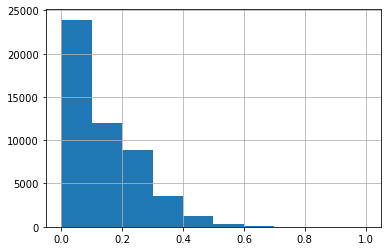

In [78]:
df['scaled_min_max'].hist()

In [79]:
std_scaler = StandardScaler()

In [80]:
std_scaler.fit(df.loc[:, ['months_in_residence']])

StandardScaler()

In [81]:
scaled_std = std_scaler.transform(df.loc[:, ['months_in_residence']])

In [82]:
df['scaled_std'] = scaled_std

<AxesSubplot:>

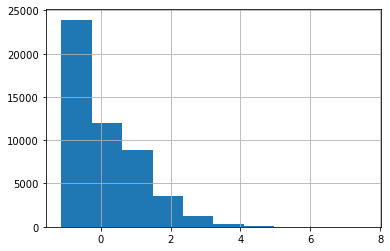

In [83]:
df['scaled_std'].hist()

In [86]:
def manual_cross_validate(df, scaler, result_col, X_cols, y_col):
    kfold = KFold(n_splits = 4)
    df[result_col] = 0
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(df.loc[:, X_cols])):
        print('Hajtas:', i)
        print('Tanito adat:', train_idx)
        print('Teszt adat:', test_idx)
    
        knn = KNeighborsClassifier(n_neighbors = 15)
        
        X_train = df.loc[train_idx, X_cols]
        y_train = df.loc[train_idx, y_col]
        X_test = df.loc[test_idx, X_cols]
        y_test = df.loc[test_idx, y_col]
    
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
        knn.fit(X_train_scaled, y_train)
        pred_proba = knn.predict_proba(X_test_scaled)
    
        print(pred_proba[:, 1])
        #df.loc[test_idx, result_col] = pred_proba[:, 1]

    return df

In [87]:
manual_cross_validate(df, MinMaxScaler(), 'pred_knn_proba_scaled', X_cols, y_col)

Hajtas: 0
Tanito adat: [12500 12501 12502 ... 49997 49998 49999]
Teszt adat: [    0     1     2 ... 12497 12498 12499]
[0.8        0.73333333 0.86666667 ... 0.93333333 0.93333333 0.93333333]
Hajtas: 1
Tanito adat: [    0     1     2 ... 49997 49998 49999]
Teszt adat: [12500 12501 12502 ... 24997 24998 24999]
[0.73333333 0.66666667 0.8        ... 0.73333333 0.53333333 0.86666667]
Hajtas: 2
Tanito adat: [    0     1     2 ... 49997 49998 49999]
Teszt adat: [25000 25001 25002 ... 37497 37498 37499]
[0.66666667 0.86666667 0.66666667 ... 0.73333333 0.73333333 0.73333333]
Hajtas: 3
Tanito adat: [    0     1     2 ... 37497 37498 37499]
Teszt adat: [37500 37501 37502 ... 49997 49998 49999]


IndexError: index 1 is out of bounds for axis 1 with size 1

# multiclass

In [119]:
df = pd.read_csv('../_data/DataSet_student-mat.csv')

In [120]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [121]:
def get_grade(point):
    if point <= 10:
        return 1
    elif point <= 14:
        return 2
    elif point <= 16:
        return 3
    elif point <= 18:
        return 4
    
    return 5

In [122]:
df['grade'] = df['G3'].apply(lambda x: get_grade(x))

In [123]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1


In [124]:
X_cols = ['goout', 'Dalc',
         'Walc', 'health',
         'absence', 'G1', 'G2']